In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import rawpy
import imageio
from PIL import Image
from glob import glob
import os
import sys

from scipy.misc import imread
from scipy.linalg import norm
from scipy import sum, average


ImportError: cannot import name 'imread' from 'scipy.misc' (c:\Users\Tanmay Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\misc\__init__.py)

In [2]:
img1 = plt.imread('D:\OneDrive - IIT Delhi\Intern\BTP\Wei-Hao-20220605T090859Z-001\TIFF\TIFFDSC_4002.tiff')

In [3]:
img2 = plt.imread('D:\OneDrive - IIT Delhi\Intern\BTP\Wei-Hao-20220605T090859Z-001\TIFF\TIFFDSC_4003.tiff')

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [5]:
img1 = rgb2gray(img1)
img2 = rgb2gray(img2)

In [6]:
print(img1.shape)
print(img2.shape)

(4924, 7378)
(4924, 7378)


In [7]:
img1.max()

254.97449999999998

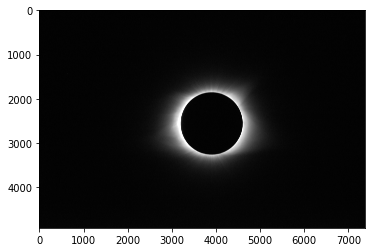

In [8]:
plt.imshow(img1, cmap = plt.get_cmap('gray'))

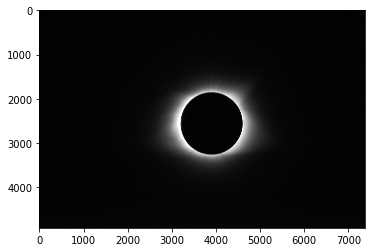

In [81]:
plt.imshow(img2, cmap = plt.get_cmap('gray'))

In [12]:
x = np.where(img2>200)

In [13]:
y = np.where(img1>200)

In [14]:
print(np.size(x[0]))
print(np.size(y[0]))

239954
239418


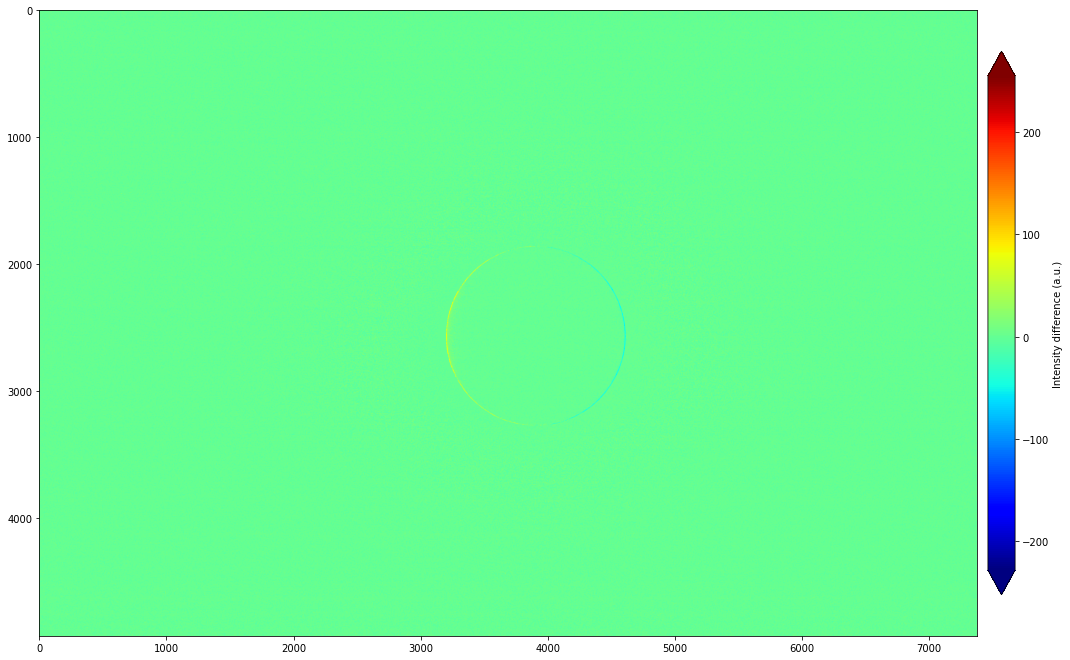

In [23]:
img_diff = img1 - img2
img_diff = img_diff*255/img_diff.max()
plt.figure(figsize=(20,20))
plt.imshow(img_diff, cmap='jet', vmin=-40, vmax=50)
plt.colorbar(shrink  = 0.5, aspect = 20, pad = 0.01, label = 'Intensity difference (a.u.)',extend='both')

In [ ]:


def main():
    file1, file2 = sys.argv[1:1+2]
    # read images as 2D arrays (convert to grayscale for simplicity)
    img1 = to_grayscale(imread(file1).astype(float))
    img2 = to_grayscale(imread(file2).astype(float))
    # compare
    n_m, n_0 = compare_images(img1, img2)
    print "Manhattan norm:", n_m, "/ per pixel:", n_m/img1.size
    print "Zero norm:", n_0, "/ per pixel:", n_0*1.0/img1.size

def compare_images(img1, img2):
    # normalize to compensate for exposure difference
    img1 = normalize(img1)
    img2 = normalize(img2)
    # calculate the difference and its norms
    diff = img1 - img2  # elementwise for scipy arrays
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    return (m_norm, z_norm)

def to_grayscale(arr):
    "If arr is a color image (3D array), convert it to grayscale (2D array)."
    if len(arr.shape) == 3:
        return average(arr, -1)  # average over the last axis (color channels)
    else:
        return arr

def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng